### Estudio de la variacion de comunidades y modulariad para distintos valores de resolucion del algoritmo de Louvain 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/home/cdsw/data/processed/contaminados_resolution_study.csv')

In [3]:
#Vemos que en el dataframe tenemos los labels iniciales junto con columnas de comunidad y modularidad para cada valor de resolucion
df

,Unnamed: 0,cont_rut,score,total_pago_f29,IVA_neto,unidad_regional,n_documentos,lifetime,alerta_inicial,comunidad_0.0,...,comunidad_0.6,modularidad_0.6,comunidad_0.7,modularidad_0.7,comunidad_0.8,modularidad_0.8,comunidad_0.9,modularidad_0.9,comunidad_1.0,modularidad_1.0
0,0,++2mOmlMTMf8FP8ASHp+UQ==,0.024528,NaN,2045987,NaN,NaN,NaN,0,1269,...,2,0.836832,2,0.841359,2,0.842336,2,0.843339,2,0.843236
1,1,++KCc/MVDP3ZynZeMovWKw==,0.023812,NaN,27477,SANTIAGO ORIENTE,NaN,NaN,0,9,...,13,0.836832,14,0.841359,14,0.842336,19,0.843339,17,0.843236
2,2,+/+IMFryGSJkidvlco+B4w==,0.045975,927465.0,76230,SANTIAGO ORIENTE,34.0,1940.0,0,16405,...,53,0.836832,4,0.841359,4,0.842336,9,0.843339,9,0.843236
3,3,+/GP2pgvQ+KWPs5dTP+nxg==,0.023277,0.0,858890,8VA UNIDAD REGIONAL BIO BIO,NaN,NaN,0,107,...,14,0.836832,15,0.841359,16,0.842336,17,0.843339,101,0.843236
4,4,+/vREtWUlsd1b34Xnt+fkA==,0.075983,NaN,19285,SANTIAGO PONIENTE,NaN,NaN,0,4016,...,1,0.836832,1,0.841359,1,0.842336,1,0.843339,1,0.843236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336699,4336699,zzMViLxxS6IFYGZoWKcJ3A==,0.023761,NaN,106163,8VA UNIDAD REGIONAL BIO BIO,NaN,NaN,0,56569,...,1,0.836832,1,0.841359,1,0.842336,21,0.843339,4,0.843236
4336700,4336700,zzU0t3f7Q3RWZ+5nQb9VCA==,0.037638,20145354.0,-25167390,8VA UNIDAD REGIONAL BIO BIO,638.0,NaN,0,45947,...,1,0.836832,4,0.841359,4,0.842336,9,0.843339,9,0.843236
4336701,4336701,zzn49i8laV7Hj40aQgF6kQ==,0.013022,3027054.0,-94661371,SANTIAGO PONIENTE,5184.0,1525.0,0,166756,...,1,0.836832,1,0.841359,1,0.842336,1,0.843339,1,0.843236
4336702,4336702,zzngID+YOuWjiPHHz0gMUw==,0.023551,NaN,12275,NaN,NaN,NaN,0,112,...,111,0.836832,89,0.841359,126,0.842336,130,0.843339,127,0.843236


In [6]:
cuenta_valores_diferentes = df['comunidad_0.5'].nunique()

print("La cuenta total de valores diferentes en la columna es:", cuenta_valores_diferentes)

La cuenta total de valores diferentes en la columna es: 128954


Ahora veamos como es la performance en un grafico de modularidad vs resolucion. Queremos obtener la mayor modularidad posible, para de este modo hacer la particion de la red de la forma mas optima. 

In [4]:

# Crear un DataFrame vacío para almacenar los resultados
resultados = {'Valor de Resolución': [], 'Modularidad Promedio': []}

# Agrupar por valor de resolución y calcular el promedio de cada columna de modularidad
for resolucion in range(0, 11):
    resolucion /= 10  # Convertir a float
    modularidad_resolucion = df.filter(regex=f"modularidad_{resolucion:.1f}")
    promedio_modularidad = modularidad_resolucion.mean().values[0]  # Obtener el valor del promedio
    resultados['Valor de Resolución'].append(resolucion)
    resultados['Modularidad Promedio'].append(promedio_modularidad)
df_resultados = pd.DataFrame(resultados)

print(df_resultados)

    Valor de Resolución  Modularidad Promedio
0                   0.0              0.754594
1                   0.1              0.762108
2                   0.2              0.774811
3                   0.3              0.784549
4                   0.4              0.790077
5                   0.5              0.789252
6                   0.6              0.836832
7                   0.7              0.841359
8                   0.8              0.842336
9                   0.9              0.843339
10                  1.0              0.843236


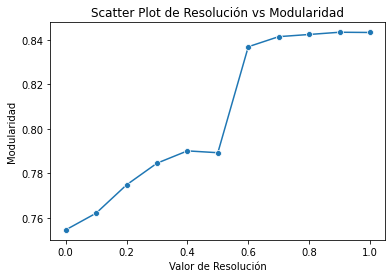

In [5]:
# Crear el scatter plot
sns.lineplot(data=df_resultados, x='Valor de Resolución', y='Modularidad Promedio', marker='o')

# Ajustar las etiquetas de los ejes y el título
plt.xlabel('Valor de Resolución')
plt.ylabel('Modularidad')
plt.title('Scatter Plot de Resolución vs Modularidad')

# Mostrar el gráfico
plt.show()


Se puede ver claramente que a partir del valor de resolucion 0.6 el valor de modularidad es mayor, por lo cual nos inclinamos por ese valor. Ahora veremos la cura de distribucion de los grupos por cantidad de integrantes. 

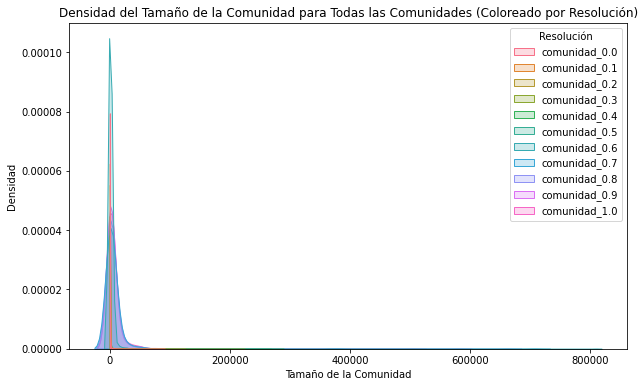

In [6]:

# Inicializar un DataFrame vacío para almacenar los tamaños de las comunidades
df_tamanos_comunidades = pd.DataFrame()

# Iterar sobre cada columna de resolución
for col in df.columns:
    if col.startswith('comunidad_'):
        # Calcular el tamaño de las comunidades para cada valor de resolución
        tamanos_comunidades = df.groupby(col).size().reset_index(name='Tamaño de Comunidad')
        # Asignar el nombre de la resolución a la columna correspondiente
        tamanos_comunidades['Resolución'] = col
        # Concatenar los resultados al DataFrame principal
        df_tamanos_comunidades = pd.concat([df_tamanos_comunidades, tamanos_comunidades])

# Graficar la densidad del tamaño de la comunidad para todas las comunidades combinadas, coloreando por resolución
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_tamanos_comunidades, x='Tamaño de Comunidad', hue='Resolución', fill=True, common_norm=False)

# Ajustar las etiquetas de los ejes y el título
plt.xlabel('Tamaño de la Comunidad')
plt.ylabel('Densidad')
plt.title('Densidad del Tamaño de la Comunidad para Todas las Comunidades (Coloreado por Resolución)')

# Mostrar el gráfico
plt.show()


Al enfocarse en los valores de resolucion donde ocurre el salto mas importante de performance:

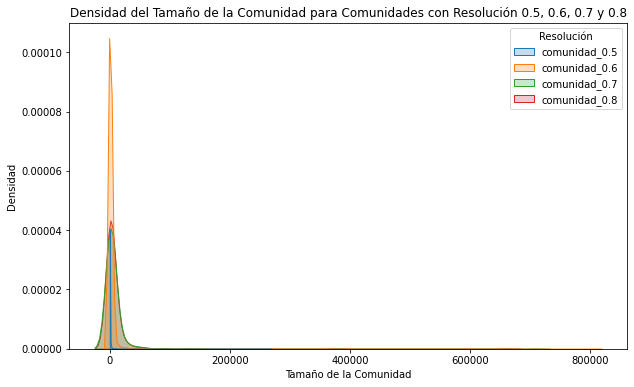

In [7]:

# Inicializar un DataFrame vacío para almacenar los tamaños de las comunidades
df_tamanos_comunidades = pd.DataFrame()

# Iterar sobre cada columna de resolución
for col in df.columns:
    if col.startswith('comunidad_') and col.endswith(('0.5', '0.6', '0.7', '0.8')):
        # Calcular el tamaño de las comunidades para cada valor de resolución
        tamanos_comunidades = df.groupby(col).size().reset_index(name='Tamaño de Comunidad')
        # Asignar el nombre de la resolución a la columna correspondiente
        tamanos_comunidades['Resolución'] = col
        # Concatenar los resultados al DataFrame principal
        df_tamanos_comunidades = pd.concat([df_tamanos_comunidades, tamanos_comunidades])

# Graficar la densidad del tamaño de la comunidad para las comunidades con resolución 0.5, 0.6, 0.7 y 0.8, coloreando por resolución
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_tamanos_comunidades, x='Tamaño de Comunidad', hue='Resolución', fill=True, common_norm=False)

# Ajustar las etiquetas de los ejes y el título
plt.xlabel('Tamaño de la Comunidad')
plt.ylabel('Densidad')
plt.title('Densidad del Tamaño de la Comunidad para Comunidades con Resolución 0.5, 0.6, 0.7 y 0.8')

# Mostrar el gráfico
plt.show()



Se puede obtener del grafico que hay menos comunidades de menor tamaño para los valores de resolucion  0.7 y 0.8. Si ahora lo vemos como disstribucion acumulada:

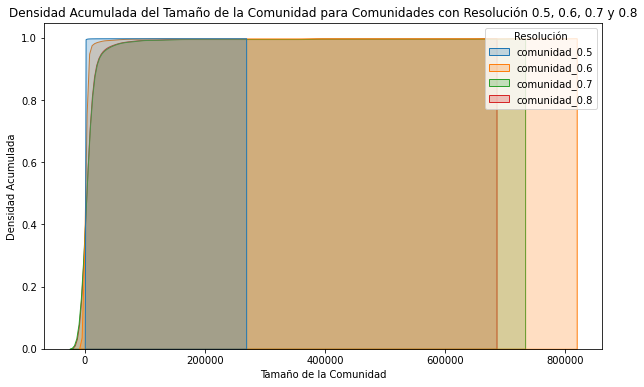

In [8]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_tamanos_comunidades, x='Tamaño de Comunidad', hue='Resolución', fill=True, common_norm=False, cumulative=True)

# Ajustar las etiquetas de los ejes y el título
plt.xlabel('Tamaño de la Comunidad')
plt.ylabel('Densidad Acumulada')
plt.title('Densidad Acumulada del Tamaño de la Comunidad para Comunidades con Resolución 0.5, 0.6, 0.7 y 0.8')

# Mostrar el gráfico
plt.show()


Se confirma lo observado previamente. Ahora vamos numericamente una tabla de frecuencia para cada tamaño de grupo en cada resolucion.

In [9]:
df = df_tamanos_comunidades

# Lista de columnas de resolución
columnas_resolucion = ['comunidad_0.5', 'comunidad_0.6', 'comunidad_0.7', 'comunidad_0.8']

# Crear un diccionario para almacenar los resultados
resultados_por_resolucion = {}

# Iterar sobre cada columna de resolución
for col_resolucion in columnas_resolucion:
    # Obtener un DataFrame para la resolución actual
    resolucion_actual = df[df[col_resolucion].notna()]
    # Contar el número de comunidades para cada tamaño de comunidad en la resolución actual
    conteo_comunidades = resolucion_actual.groupby('Tamaño de Comunidad').size().reset_index(name='Número de Comunidades')
    # Ordenar por tamaño de comunidad de menor a mayor
    conteo_comunidades = conteo_comunidades.sort_values(by='Tamaño de Comunidad')
    # Guardar el resultado en el diccionario
    resultados_por_resolucion[col_resolucion] = conteo_comunidades

# Imprimir los resultados por resolución
for resolucion, resultado in resultados_por_resolucion.items():
    print(f"Resolución: {resolucion}")
    display(resultado.head(20))
    print()


Resolución: comunidad_0.5


,Tamaño de Comunidad,Número de Comunidades
0,1,12
1,2,48171
2,3,22402
3,4,11886
4,5,7444
5,6,4941
6,7,3696
7,8,2992
8,9,2341
9,10,1850



Resolución: comunidad_0.6


,Tamaño de Comunidad,Número de Comunidades
0,1,11
1,2,200
2,3,50
3,4,153
4,5,162
5,6,135
6,7,120
7,8,91
8,9,77
9,10,64



Resolución: comunidad_0.7


,Tamaño de Comunidad,Número de Comunidades
0,1,11
1,2,200
2,3,56
3,4,27
4,5,11
5,6,11
6,7,7
7,8,4
8,9,2
9,10,5



Resolución: comunidad_0.8


,Tamaño de Comunidad,Número de Comunidades
0,1,11
1,2,195
2,3,53
3,4,25
4,5,10
5,6,13
6,7,5
7,8,7
8,9,2
9,10,3


Ahora, bien los valores maximos, minimo y promedio de tamaño de grupo para cada resolucion:

In [10]:
# Lista de columnas de resolución
columnas_resolucion = ['comunidad_0.5', 'comunidad_0.6', 'comunidad_0.7', 'comunidad_0.8']

# Lista para almacenar los resultados
resultados_estadisticos = []

# Iterar sobre cada columna de resolución
for col_resolucion in columnas_resolucion:
    # Obtener un DataFrame para la resolución actual
    resolucion_actual = df[df[col_resolucion].notna()]
    # Calcular estadísticas para la resolución actual
    tamano_min = resolucion_actual['Tamaño de Comunidad'].min()
    tamano_max = resolucion_actual['Tamaño de Comunidad'].max()
    tamano_promedio = resolucion_actual['Tamaño de Comunidad'].mean()
    # Agregar los resultados a la lista
    resultados_estadisticos.append({'Resolución': col_resolucion,
                                    'Tamaño Mínimo': tamano_min,
                                    'Tamaño Máximo': tamano_max,
                                    'Tamaño Promedio': tamano_promedio})

# Convertir la lista de resultados en un DataFrame
resultados_estadisticos = pd.DataFrame(resultados_estadisticos)

# Imprimir los resultados
print(resultados_estadisticos)

      Resolución  Tamaño Mínimo  Tamaño Máximo  Tamaño Promedio
0  comunidad_0.5              1         268335        33.629853
1  comunidad_0.6              1         809798      1315.747573
2  comunidad_0.7              1         707655      5965.204952
3  comunidad_0.8              1         661713      5805.493976


Nos inclinamos por el valor de resolucion 0.8, de esta forma tenemos menos grupos con un numero bajo de integrantes pero que permite una mejor focalizacion en los grupos contaminados.